In [18]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

### 1. Modelo con los datos sin balancear

In [19]:
df = pd.read_pickle("datos/invistico_airline_encoding.pkl")
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,...,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,1,0,1,0,2,0,0,0,3,3,...,4,4,0,4,1,4,3,1.041667,-1.400844,0.000000
1,1,1,1,0,1,0,0,0,5,0,...,4,3,3,5,2,4,3,0.291667,0.454852,25.833333
2,1,0,1,0,2,0,0,0,5,3,...,4,4,4,5,3,5,3,-1.041667,0.179747,0.000000
3,1,0,1,0,2,0,0,0,5,3,...,3,2,0,1,3,1,4,0.833333,-1.098734,0.000000
4,1,0,1,0,2,0,0,0,5,1,...,4,2,0,2,3,2,1,1.250000,-1.325738,0.000000


In [20]:
# separamos los datos en variable respuesta (X) y predictoras (y)
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [21]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [22]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

In [6]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
# plt.show();

In [23]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 
max_features = np.sqrt(len(x_train1.columns))
max_features

4.58257569495584

In [24]:
# max depth
print(arbol.tree_.max_depth)

37


In [25]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test = arbol.predict(x_test1)
y_pred_train = arbol.predict(x_train1)

In [41]:
dt_results1 = spf.metricas(y_test1, y_pred_test, y_train1, y_pred_train, "Decision Tree I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.939637,0.944185,0.946297,0.94524,0.877996,test,Decision Tree I
1,1.000000,1.000000,1.000000,1.00000,1.000000,train,Decision Tree I


In [27]:
# definimos un diccionario con los hiperparámetros que queremos modificar

param = {"max_depth": [2, 4, 6, 10, 12, 14], # teniendo en cuenta que teníamos un overfitting muy claro tendremos que reducir la profundidad del modelo bastante
        "max_features": [2, 3, 4, 5],# Ponemos como límite el 5 ya que es el resultado de la raiz cuadrada era 4,58. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10, 50, 100]} 

In [28]:
# iniciamos el modelo con GridSearch

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
                    param_grid= param, # que hiperparámetros queremos que testee
                    cv=10, # crossvalidation 
                    verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [29]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [30]:
# obtenemos el mejor modelo
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=14, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [15]:
# # veamos ahora que pinta tiene nuestro árbol
# fig = plt.figure(figsize=(40, 20))
# tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True)
# plt.show();

In [31]:
# utilizando el mejor modelo realizamos las predicciones
y_pred_test2 = mejor_modelo.predict(x_test1)
y_pred_train2 = mejor_modelo.predict(x_train1)

In [43]:
#obtenemos las métricas
dt_results2 = spf.metricas(y_test1, y_pred_test2, y_train1,  y_pred_train2, "Decision tree II")
dt_results2


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
1,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II


In [44]:
# juntamos los dataframes de los resultados de los modelos para poder compararlos mejor
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.939637,0.944185,0.946297,0.945240,0.877996,test,Decision Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I
0,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
1,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II


In [45]:
# cargamos el csv con los resultados del algoritmo de regresión logística para comparar todos los modelos
df_logistic_results = pd.read_csv("datos/resultados_satisfaction_logistica.csv", index_col = 0)
df_logistic_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.846281,0.855448,0.867352,0.861359,0.688901,test,Regresión logistica
1,0.843259,0.852162,0.862906,0.857500,0.683371,train,Regresión logistica
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión logistica balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión logistica balanceado


In [46]:
# añadimos los resultados de los decision trees
df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.846281,0.855448,0.867352,0.861359,0.688901,test,Regresión logistica
1,0.843259,0.852162,0.862906,0.857500,0.683371,train,Regresión logistica
2,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión logistica balanceado
3,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión logistica balanceado
4,0.939637,0.944185,0.946297,0.945240,0.877996,test,Decision Tree I
5,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I
6,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
7,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II


### 2. Modelo con los datos balanceados

In [2]:
# abrimos el dataset
df_bal = pd.read_pickle("datos/invistico_airline_encod_balance.pkl")
df_bal.sample(5)

,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,...,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes,satisfaction
44677,0,0,1,2,3,1,4,5,2,4,...,2,2,4,3,5,3,-0.625000,-0.481857,0.000000,0
243,0,1,0,2,0,2,0,4,2,0,...,4,3,4,3,5,3,-0.458333,0.075949,0.000000,1
14706,0,1,0,2,3,2,4,5,3,3,...,3,3,5,3,5,1,-1.375000,0.513080,0.000000,1
68548,1,1,1,0,3,3,3,4,3,4,...,4,3,5,2,4,3,-1.333333,0.232911,0.666667,0
31383,1,1,0,0,3,3,4,1,1,4,...,3,3,5,1,3,2,0.583333,0.273418,1.166667,0


In [3]:
# separamos los datos en variable respuesta (X) y predictoras (y)
X_bal = df_bal.drop("satisfaction", axis = 1)
y_bal = df_bal["satisfaction"]

In [4]:
# separamos en train y test
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = 42)

In [5]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol_bal = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(random_state=0)

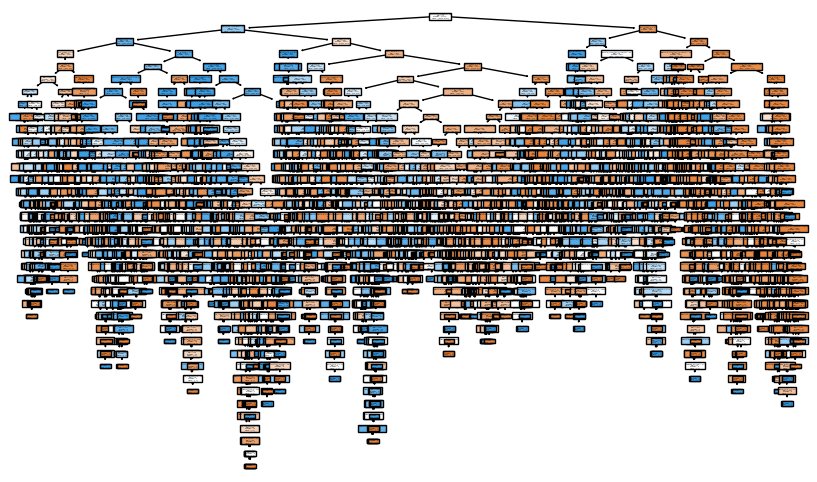

In [6]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol_bal, feature_names = x_train_bal.columns, filled = True)
plt.show();

In [9]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train_bal.columns))
max_features

4.58257569495584

In [11]:

# max depth

print(arbol_bal.tree_.max_depth)

36


In [13]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol_bal.predict(x_test_bal)
y_pred_train_esta = arbol_bal.predict(x_train_bal)

In [14]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [39]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results_bal = metricas(y_test_bal, y_pred_test_esta, y_train_bal, y_pred_train_esta, "Decision Tree Balanceado")
dt_results_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.947576,0.94661,0.947976,0.947293,0.895149,test,Decision Tree Balanceado
1,1.000000,1.00000,1.000000,1.000000,1.000000,train,Decision Tree Balanceado


In [47]:
# añadimos los resultados de los decision trees
df_DT_LR_results_final = pd.concat([df_DT_LR_results, dt_results_bal], axis = 0).reset_index(drop=True)
df_DT_LR_results_final

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.846281,0.855448,0.867352,0.861359,0.688901,test,Regresión logistica
1,0.843259,0.852162,0.862906,0.857500,0.683371,train,Regresión logistica
2,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión logistica balanceado
3,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión logistica balanceado
4,0.939637,0.944185,0.946297,0.945240,0.877996,test,Decision Tree I
5,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I
6,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
7,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II
8,0.947576,0.946610,0.947976,0.947293,0.895149,test,Decision Tree Balanceado
9,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree Balanceado


In [48]:
df_DT_LR_results_final.drop([4,5,8,9], axis = 0, inplace = True)
df_DT_LR_results_final

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.846281,0.855448,0.867352,0.861359,0.688901,test,Regresión logistica
1,0.843259,0.852162,0.862906,0.857500,0.683371,train,Regresión logistica
2,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión logistica balanceado
3,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión logistica balanceado
6,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decision tree II
7,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decision tree II


In [ ]:
# pongamos un poco de color a nuestro dataframe para ver la comparación de los datos de una forma un poco más amigable. 
df_DT_LR_results_final.style.background_gradient(cmap='seismic')

In [50]:
df_DT_LR_results_final.to_csv("datos/resultados_satisfaction_DT.csv")

In [55]:

# vamos a crearnos un dataframe 
importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train_bal.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_esta


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,seat_comfort,0.153961
13,leg_room_service,0.136161
0,gender,0.116549
9,inflight_entertainment,0.103143
1,customer_type,0.101937
2,type_of_travel,0.078669
17,online_boarding,0.074874
6,food_and_drink,0.066580
12,onboard_service,0.037337
10,online_support,0.018082


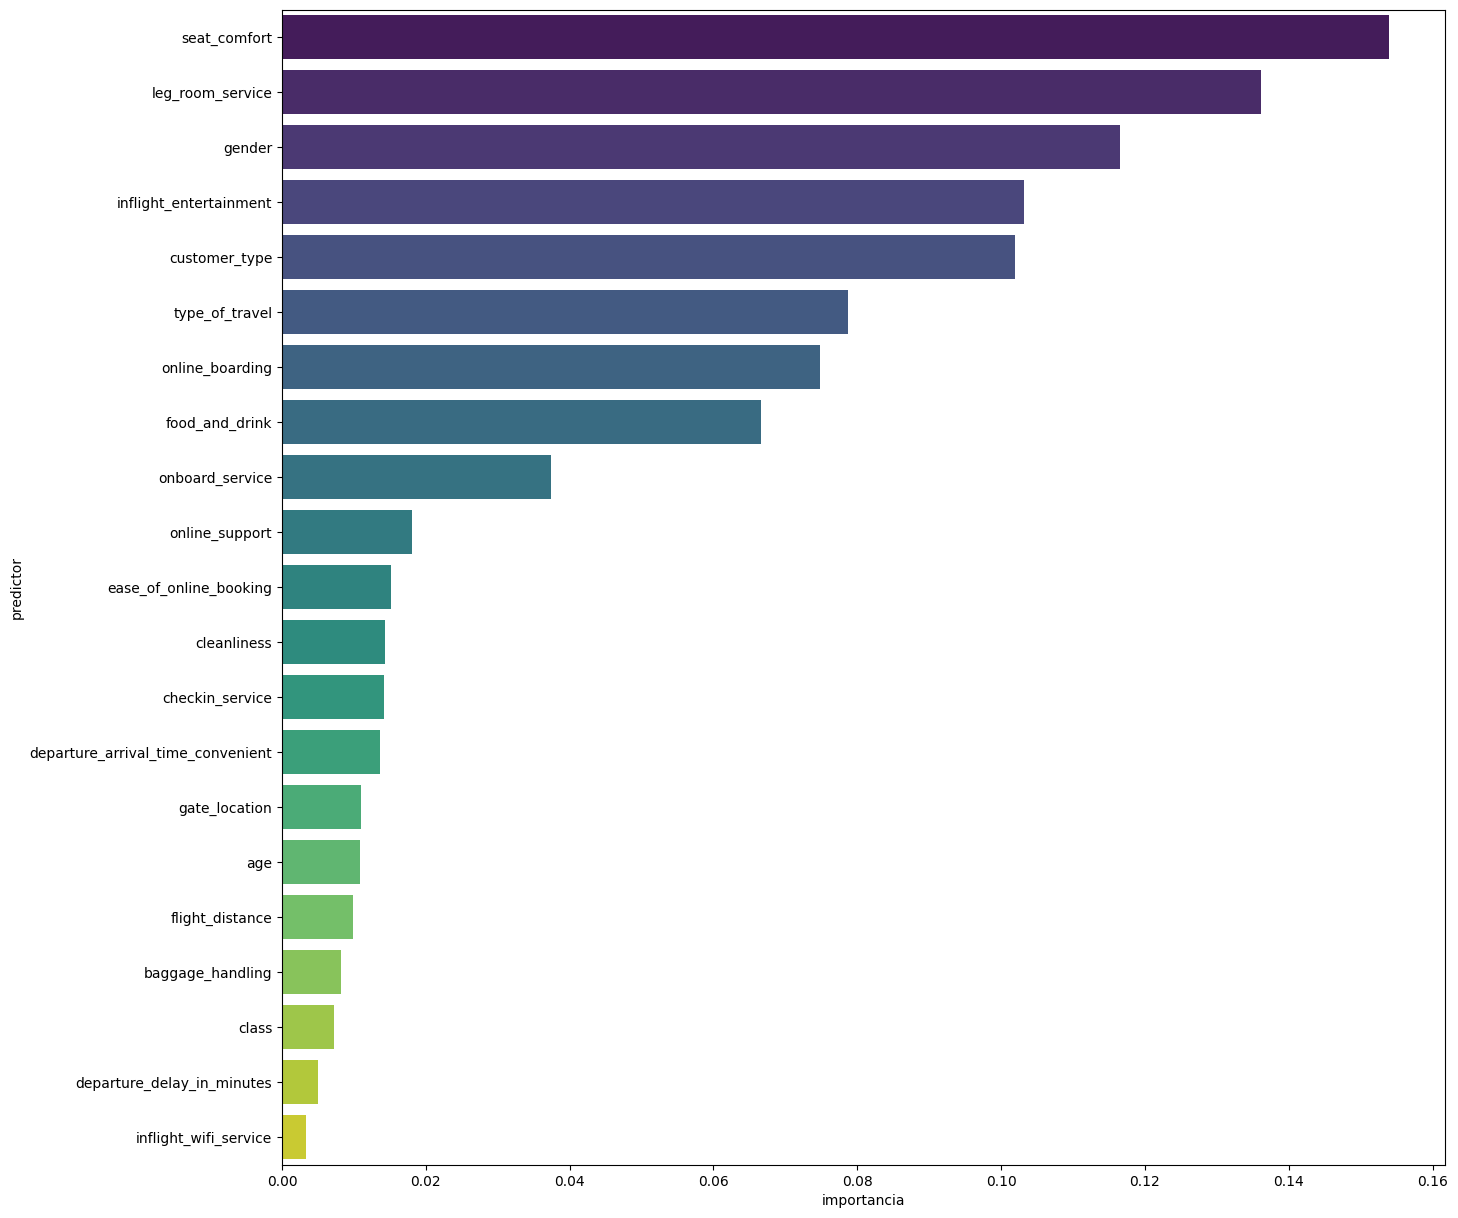

In [57]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(15,15))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="viridis");
plt.show()